In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [220]:
train_df = pd.read_csv("titanic/train.csv", index_col='PassengerId') 
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [221]:
train_features_df = train_df.drop(axis=1, columns=['Survived'])
train_features_df.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [222]:
train_output_df = train_df[['Survived']]
train_output_df.head(2)

,Survived
PassengerId,
1,0
2,1


### DATA - x (features)
### TARGET - y (output)


In [223]:
test_features_df = pd.read_csv("titanic/test.csv", index_col='PassengerId') 
test_features_df.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [224]:
test_output_df = pd.read_csv("titanic/gender_submission.csv", index_col='PassengerId') 
test_output_df.head(2)

,Survived
PassengerId,
892,0
893,1


## CONCLUZIE
# train_features_df, train_output_df  - antrenare (train) 
# test_features_df, test_output - testare (test)

In [225]:
train_features_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [226]:
train_features_df.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [227]:
train_features_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Numele - poate fi scos

In [228]:
train_features_df["Name"].nunique()

891

In [229]:
train_features_df["Ticket"].nunique()

681

In [230]:
train_features_df["Ticket"].isnull().sum()

np.int64(0)

In [231]:
# Concluzia bilet - as putea sa renunt la bilet

In [232]:
train_features_df["Cabin"].isnull().sum() 

np.int64(687)

In [233]:
train_features_df["Cabin"].nunique()

147

In [234]:
cabin_numbers = list(set(train_features_df["Cabin"]))
set([ str(i)[0] for i in cabin_numbers])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n'}

In [235]:
train_features_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

C = Cherbourg, Q = Queenstown, S = Southampton

In [236]:
train_features_df.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [237]:
train_features_df = train_features_df.drop("Name", axis=1)
train_features_df.head(2)


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,female,38.0,1,0,PC 17599,71.2833,C85,C


In [238]:
train_features_df["Gender"] = train_features_df["Sex"].map({"male": 45, "female": 13})
train_features_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
PassengerId,,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,45
2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,13
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,13
4,1,female,35.0,1,0,113803,53.1000,C123,S,13
5,3,male,35.0,0,0,373450,8.0500,NaN,S,45


In [239]:
train_features_df = train_features_df.drop("Sex", axis=1)
train_features_df.head(2)

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
PassengerId,,,,,,,,,
1,3,22.0,1,0,A/5 21171,7.2500,NaN,S,45
2,1,38.0,1,0,PC 17599,71.2833,C85,C,13


In [240]:
# In cazul in care nu vreau sa pun o mapare

# train_features_df["Gender"] = train_features_df["Sex"] == "male"
# train_features_df.head(5)

In [241]:
# train_features_df["Sex"] = train_features_df["Sex"].map({"male": 1, "female": 0})
# train_features_df.head(2)

In [242]:
train_features_df = train_features_df.drop("Ticket", axis=1)
train_features_df.head(2)

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Gender
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,NaN,S,45
2,1,38.0,1,0,71.2833,C85,C,13


In [243]:
train_features_df["Embarked"] = train_features_df["Embarked"].map({"S": 1, "C": 0, "Q": 2})
train_features_df.head(5)

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Gender
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,NaN,1.0,45
2,1,38.0,1,0,71.2833,C85,0.0,13
3,3,26.0,0,0,7.9250,NaN,1.0,13
4,1,35.0,1,0,53.1000,C123,1.0,13
5,3,35.0,0,0,8.0500,NaN,1.0,45


In [244]:
train_features_df["Cabin"].unique(), train_features_df["Cabin"].nunique()

(array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
   

In [245]:
train_features_df["Cabin_LEVEL"] = train_features_df["Cabin"].astype(np.str_).str[0]
train_features_df

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Gender,Cabin_LEVEL
PassengerId,,,,,,,,,
1,3,22.0,1,0,7.2500,NaN,1.0,45,n
2,1,38.0,1,0,71.2833,C85,0.0,13,C
3,3,26.0,0,0,7.9250,NaN,1.0,13,n
4,1,35.0,1,0,53.1000,C123,1.0,13,C
5,3,35.0,0,0,8.0500,NaN,1.0,45,n
...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,NaN,1.0,45,n
888,1,19.0,0,0,30.0000,B42,1.0,13,B
889,3,NaN,1,2,23.4500,NaN,1.0,13,n


In [246]:
train_features_df = train_features_df.drop("Cabin", axis=1)
train_features_df.head(3)

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,Cabin_LEVEL
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1.0,45,n
2,1,38.0,1,0,71.2833,0.0,13,C
3,3,26.0,0,0,7.9250,1.0,13,n


In [247]:
keys = sorted(train_features_df["Cabin_LEVEL"].unique())
keys

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n']

In [248]:
{ item:index for index, item in enumerate(keys)}

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'n': 8}

In [249]:
train_features_df["Cabin_LEVEL"] = train_features_df["Cabin_LEVEL"].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'n': 8})
train_features_df.head(3)

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,Cabin_LEVEL
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1.0,45,8
2,1,38.0,1,0,71.2833,0.0,13,2
3,3,26.0,0,0,7.9250,1.0,13,8


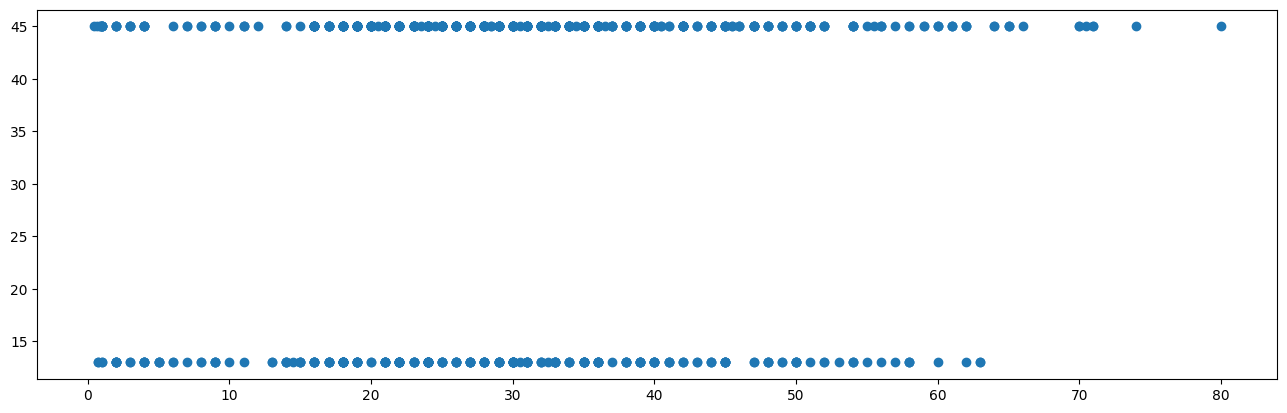

In [250]:
plt.scatter(train_features_df["Age"], train_features_df["Gender"])

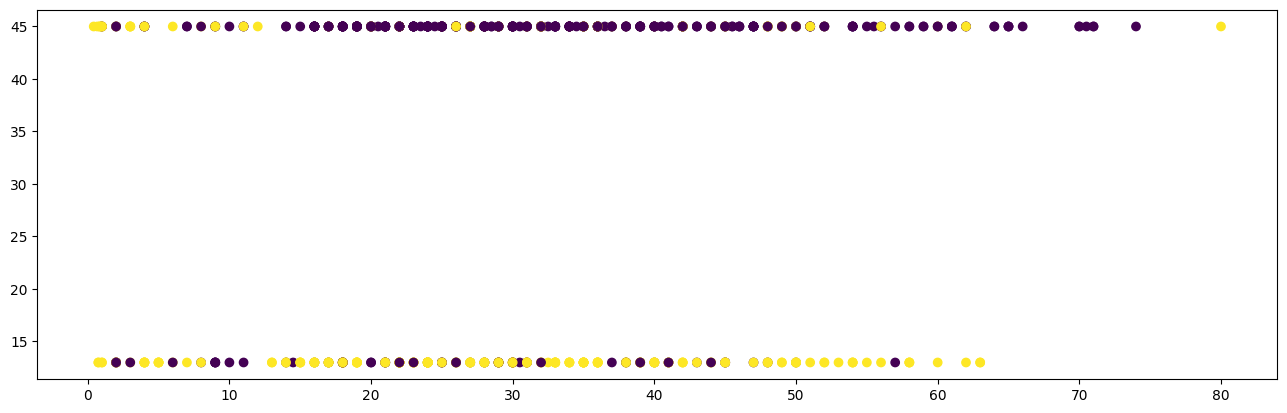

In [251]:
plt.scatter(train_features_df["Age"], train_features_df["Gender"], c=train_output_df["Survived"])

In [252]:
plt.rcParams["figure.figsize"]

[16.0, 4.8]

In [253]:
plt.rcParams["figure.figsize"] = [16, 4.8]

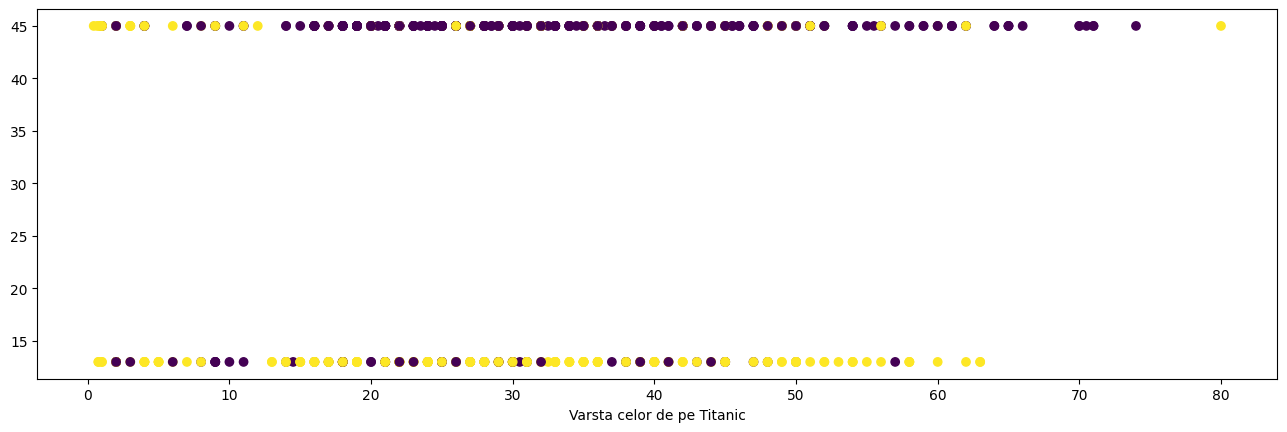

In [254]:
plt.scatter(train_features_df["Age"], train_features_df["Gender"], c=train_output_df["Survived"])
plt.xlabel("Varsta celor de pe Titanic");

In [255]:
train_features_df.corr()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,Cabin_LEVEL
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.307324,0.131900,0.746616
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.042340,0.093254,-0.267270
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,0.031095,-0.114631,0.041540
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.035756,-0.245489,-0.032548
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.269588,-0.182333,-0.523013
Embarked,0.307324,-0.042340,0.031095,-0.035756,-0.269588,1.000000,0.023175,0.258299
Gender,0.131900,0.093254,-0.114631,-0.245489,-0.182333,0.023175,1.000000,0.123076
Cabin_LEVEL,0.746616,-0.267270,0.041540,-0.032548,-0.523013,0.258299,0.123076,1.000000


# seaborn

In [256]:
import seaborn as sns

In [258]:
plt.rcParams["figure.figsize"] = [6.4, 4.8]

<Axes: >

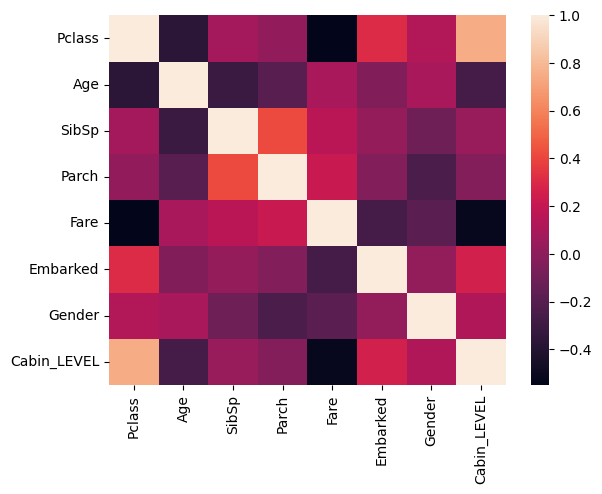

In [259]:
sns.heatmap(train_features_df.corr())

<Axes: >

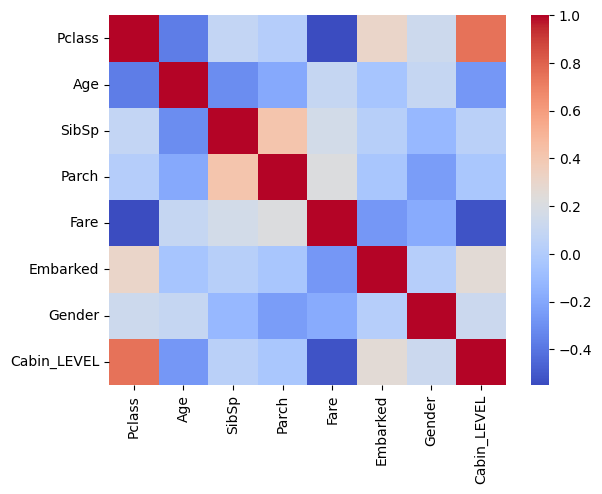

In [260]:
sns.heatmap(train_features_df.corr(), cmap="coolwarm")

In [261]:
train_features_df["Pclass"].unique()

array([3, 1, 2])

In [262]:
train_features_df["Cabin_LEVEL"].unique()

array([8, 2, 4, 6, 3, 0, 1, 5, 7])